In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from sklearn.utils import class_weight
from keras.layers import GlobalAveragePooling2D
from PIL import Image
from vis.visualization import visualize_cam
from flask import request,jsonify,send_file
from PIL import ImageDraw 
from PIL import ImageFont

/home/parmeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/parmeet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

def normalize_image(ima):
    return (ima - np.min(ima))/(np.max(ima) - np.min(ima))

In [3]:
datagen = ImageDataGenerator(rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2
    )
from keras.preprocessing import image
img = image.load_img("images/kusk fish/41. 4b2875f367758fea698bda68320fd43c.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

fig = plt.figure(figsize=(10,10))
i = 1
images_list = []
for X_batch in datagen.flow(normalize_image(x)):
    for imag in X_batch:
        images_list.append(imag)
    i = i + 1
    if i>10:
        break
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images_list[i])

In [4]:
def extract_image(image_path):
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        return x

In [5]:
datagen = ImageDataGenerator(rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    #rescale=(1.0/255)
    #preprocessing_function=add_brightness
    )

In [6]:
labels = []
image_features = []

labels_test = []
image_features_test = []

images = []
image_count = 0
for idx,label in enumerate(os.listdir("images")):
    listdir = np.array(os.listdir("images/"+label))
    print(label,len(listdir))
    batch_sz = 100
    features = []
    labs = []
    label_batches = []
    
    labs_test = []
    label_batches_test = []
    count = 0
    for file in listdir:
        try:
            path = "images/"+label+'/'+file
            features.append(np.array(extract_image(path)[0]))
        except Exception as ex:
            print(ex)
            count = count + 1
    print("Count is",count)
    temp_features = np.array(features)
    print(temp_features.shape)
    print("Done processing features")
    for i in range(int(len(listdir)/batch_sz)):
        X_features = temp_features[i*batch_sz:i*batch_sz+batch_sz]
        X_train, X_test, _, _ = train_test_split(X_features,np.ones(batch_sz,dtype='int'))
        times = 0
        for X_batch in datagen.flow(X_train,batch_size=batch_sz):
                for aug_image in X_batch:
                    aug_image = preprocess_input(aug_image)
                    #transformed_features = vgg_model(np.expand_dims(aug_image, axis=0))
                    label_batches.append(aug_image)
                    labs.append(label)
                times = times + 1
                if times>1:
                    break
        for aug_image in X_test:
            images.append(aug_image)
            aug_image = preprocess_input(aug_image)
            #transformed_features = vgg_model(np.expand_dims(aug_image, axis=0))
            label_batches_test.append(aug_image)
            labs_test.append(label)
        
    image_features = image_features + label_batches
    labels = labels + labs

    image_features_test = image_features_test + label_batches_test
    labels_test = labels_test + labs_test
    print(len(image_features_test))
    print(len(images))

cod caught 717
Count is 0
(717, 224, 224, 3)
Done processing features
175
175
out of water halibut 611
cannot identify image file 'images/out of water halibut/10. halibut-havens-california-fishing-sls0917_f2-hali_solcal06.jpg'
cannot identify image file 'images/out of water halibut/221. halibut-havens-california-fishing-sls0917_f2-hali_solcal07.jpg'
Count is 2
(609, 224, 224, 3)
Done processing features
325
325
kusk fish 351


/home/parmeet/anaconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Count is 0
(351, 224, 224, 3)
Done processing features
400
400
fresh caught jonah crab 420
Count is 0
(420, 224, 224, 3)
Done processing features
500
500
caught lobster 573
Count is 0
(573, 224, 224, 3)
Done processing features
625
625


In [7]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(labels),labels)

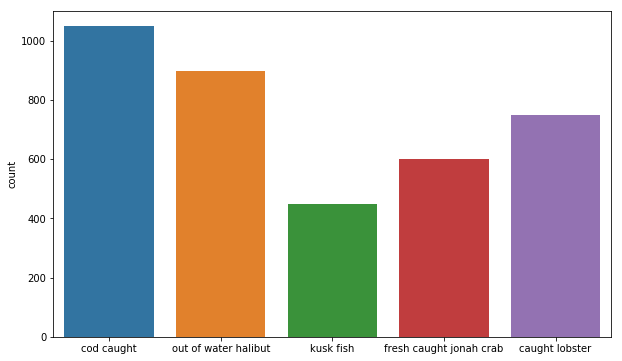

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(labels)

In [9]:
num_labels = len(np.unique(labels))

In [10]:
# image_f = np.squeeze(np.array(image_features),axis=1)
# image_f_test = np.squeeze(np.array(image_features_test),axis=1)

In [11]:
# num_of_train_examples = image_f.shape
# print(num_of_train_examples)
# num_of_test_examples = image_f_test.shape
# print(num_of_test_examples)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
le.fit(list(labels)+list(labels_test))
#le.fit(list(labels))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)
one = preprocessing.OneHotEncoder()
#one.fit(list(le_labels.reshape(-1,1)))
one.fit(list(le_labels.reshape(-1,1))+list(le_labels_test.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

vgg_model.layers.pop()
x = vgg_model.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
out = Dense(2048,activation='relu')(x)
out = BatchNormalization()(out)
out = Dense(5,activation='softmax')(out)


model = Model(inputs=vgg_model.input, outputs=out)

for layer in vgg_model.layers[:-1]:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['acc'])
model.save_weights('transfer_learning_visualize.hd5')

In [86]:
# batch_sz = 30
# num_batchs = int(len(image_features)/batch_sz)

# # epochs = 3
# # print(num_batchs)
# # for j in range(epochs): 
# #     for i in range(num_batchs):
# #         print("epochs",j,"batch",i)
# #         model.fit(np.array(image_features[i*batch_sz:i*batch_sz+batch_sz]), one_labels[i*batch_sz:i*batch_sz+batch_sz], epochs=1, verbose=0,class_weight=class_weights)
# batch_sz = 30
# test_scores = []
# num_batchs = int(len(image_features_test)/batch_sz)
# for i in range(num_batchs):
#     test_scores.append(model.evaluate(np.array(image_features_test[i*batch_sz:i*batch_sz+batch_sz]), one_labels_test[i*batch_sz:i*batch_sz+batch_sz], verbose=0))

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=1000)
test_cvscores = []
validation_cvscores = []
for train, test in kf.split(image_features):
    model.load_weights('transfer_learning_visualize.hd5')
    hist = model.fit(np.array(image_features)[train], one_labels[train], epochs=10, verbose=1,class_weight=class_weights,batch_size=50)
    validation_score = model.evaluate(np.array(image_features)[test], one_labels[test], verbose=1)
    test_score = model.evaluate(np.array(image_features_test), one_labels_test, verbose=1)
    predictions = model.predict(np.array(image_features_test), verbose=1)
    pred_labels = np.argmax(predictions,axis=1)
    predicted_labels = le.inverse_transform(pred_labels)
    #print(labels[test])
    test_cvscores.append(test_score)
    validation_cvscores.append(validation_score)

Epoch 1/10
3000/3000 [==============================] - 30s 10ms/step - loss: 1.4303 - acc: 0.6743
Epoch 2/10
3000/3000 [==============================] - 30s 10ms/step - loss: 0.5927 - acc: 0.8333
Epoch 3/10
3000/3000 [==============================] - 31s 10ms/step - loss: 0.2756 - acc: 0.9143
Epoch 4/10
3000/3000 [==============================] - 31s 10ms/step - loss: 0.1970 - acc: 0.9380
Epoch 5/10
3000/3000 [==============================] - 31s 10ms/step - loss: 0.1481 - acc: 0.9593
Epoch 6/10
3000/3000 [==============================] - 31s 10ms/step - loss: 0.0937 - acc: 0.9697
Epoch 7/10
1900/3000 [==================>...........] - ETA: 11s - loss: 0.1206 - acc: 0.9663

KeyboardInterrupt: 

In [18]:
model.save_weights('transfer_learning_visualize.hd5')

In [19]:
for layer in model.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 True
global_average_pooling2d_1 True
batch_normalization_1 True
dense_1 True
batch_normalization_2 True
dense_2 True


In [20]:
# #print("Validation Standard Deviation",np.std(validation_cvscores))
# print("Test Standard Deviation",np.std(test_cvscores))

In [22]:
plt.imshow(normalize_image(image_features_test[2]))

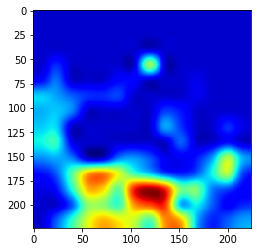

In [44]:
heat_map = visualize_cam(model, 18, 5,image_features_test[2])
plt.imshow(heat_map)

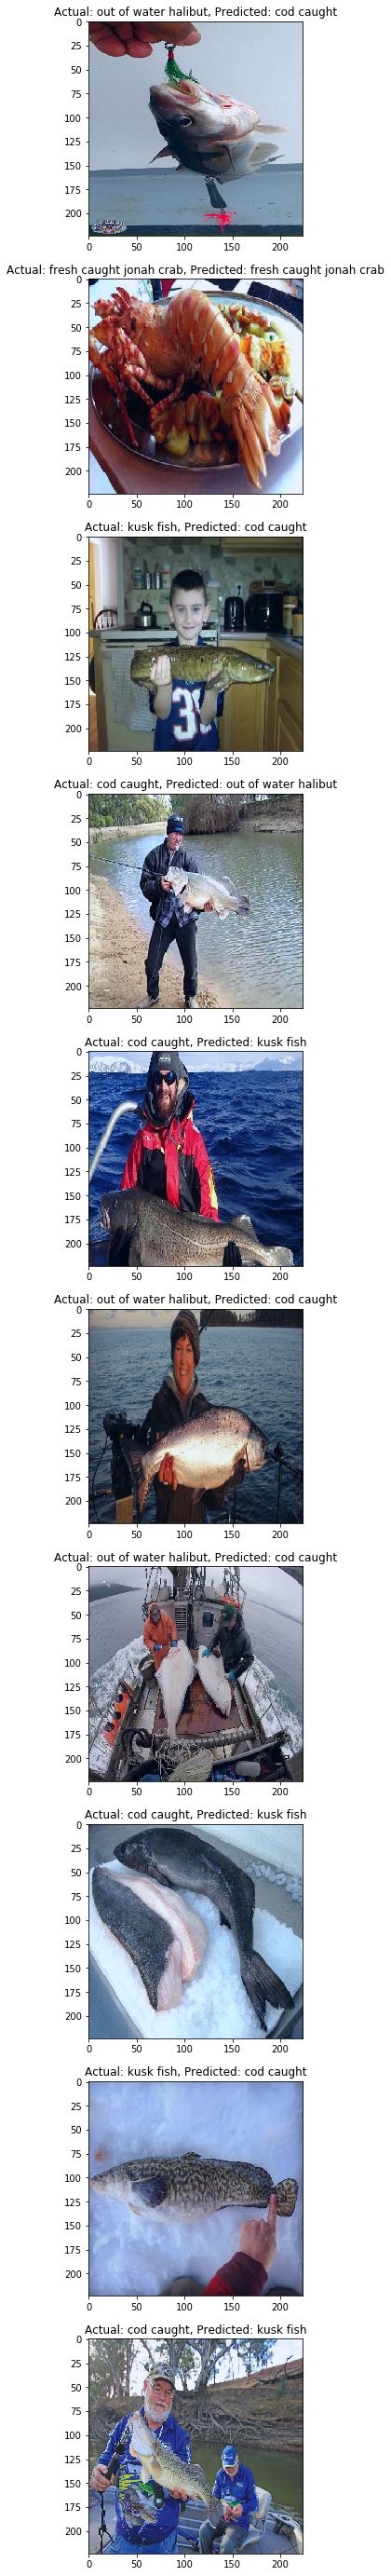

In [194]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)!=predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    #ima = images[test[np.array(labels)[test]==predicted_labels][0]]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels)[test[i]]+', Predicted: '+predicted_labels[i])
    #print("Actual Label",np.array(labels)[test[eq_idx_list[i]]])
    #print("Predicted Label",predicted_labels[eq_idx_list[i]])
plt.show()

In [4]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)==predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    #ima = images[test[np.array(labels)[test]==predicted_labels][0]]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
    #print("Actual Label",np.array(labels)[test[eq_idx_list[i]]])
    #print("Predicted Label",predicted_labels[eq_idx_list[i]])
plt.show()

NameError: name 'plt' is not defined

In [196]:
from sklearn.metrics import confusion_matrix

[[110   3   8   0   4]
 [  3 111   2  27  32]
 [ 11   2  85   1   1]
 [  0  22   2  42   9]
 [  8  25   0   3 114]]


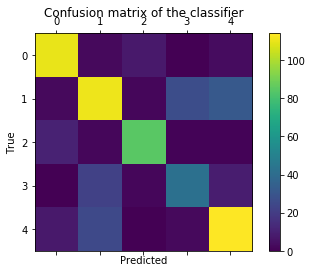

In [207]:
confusion_matrix(labels_test,predicted_labels)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_test, predicted_labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
one_labels[train].shape

(3000, 5)

In [103]:
from werkzeug.wrappers import Request, Response
from flask import Flask,send_file
from flask_cors import CORS, cross_origin
import scipy.misc

app = Flask(__name__)
cors = CORS(app)

app.config['SECRET_KEY'] = 'the quick brown fox jumps over the lazy   dog'
app.config['CORS_HEADERS'] = 'Content-Type'

cors = CORS(app, resources={r"/get_images": {"origins": "http://localhost:port"}})


@app.route("/get_images",methods=['POST'])
@cross_origin(origin='localhost',headers=['Content- Type','Authorization'])
def hello(authorization_result=None):
    f = request.files['file']
    
    f.save(f.filename)
    img = image.load_img(f.filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    heat_map = visualize_cam(model, 20, 0, x)
    scipy.misc.imsave("conv_20"+f.filename, heat_map)
    add_caption("conv_20"+f.filename,"Layer 20")
    heat_map = visualize_cam(model, 15, 0, x)
    scipy.misc.imsave("conv_15"+f.filename, heat_map)
    add_caption("conv_15"+f.filename,"Layer 15")
    heat_map = visualize_cam(model, 10, 0, x)
    scipy.misc.imsave("conv_10"+f.filename, heat_map)
    add_caption("conv_10"+f.filename,"Layer 10")
    heat_map = visualize_cam(model, 5, 0, x)
    scipy.misc.imsave("conv_5"+f.filename, heat_map)
    add_caption("conv_5"+f.filename,"Layer 5")
    prediction_string = "The predicted species is" + le.inverse_transform(np.argmax(model.predict(x)))
    return prediction_string

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
/home/parmeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/parmeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/parmeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/parmeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/parmeet/anaconda3/lib/python3.6/site-p

In [98]:
def add_caption(image_name,caption):
    img = Image.open(image_name)
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text((0, 0),caption,(255,255,255))
    img.save(image_name)